In [408]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%pylab inline
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [329]:
data = pd.read_csv('2012_weather_merged',sep='\t',header=None)


In [331]:
data.columns= ['Time', 'Tips', 'TEMP', 'WDSP', 'VISIB', 'MAX', 'MIN', 'PRCP', 'SNDP', 'FRSHTT']
data  = data[data.Tips <=5]
data.head()

,Time,Tips,TEMP,WDSP,VISIB,MAX,MIN,PRCP,SNDP,FRSHTT
0,20120101,2.362,46.3,9.3,10.0,55.9,37.9,0.00G,999.9,0
1,20120102,2.332,43.2,16.7,9.9,50.0,37.0,0.07G,999.9,10000
2,20120103,2.189,30.3,15.2,10.0,50.0,21.9,0.00G,999.9,0
4,20120105,2.127,32.1,11.6,10.0,42.1,12.9,0.00G,999.9,0
5,20120106,2.109,41.2,9.6,10.0,54.0,26.1,0.00G,999.9,0


In [333]:
def convert(int):
    return str(int)
data.Time = map(convert,data.Time)

def strip(string):
    try:
        return string[:-1]
    except:
        pass

        

data.PRCP = [strip(x) for x in data.PRCP.values]


data.PRCP = [float(y) for y in data.PRCP.values]



In [335]:
data.Time = map(date, data.Time)

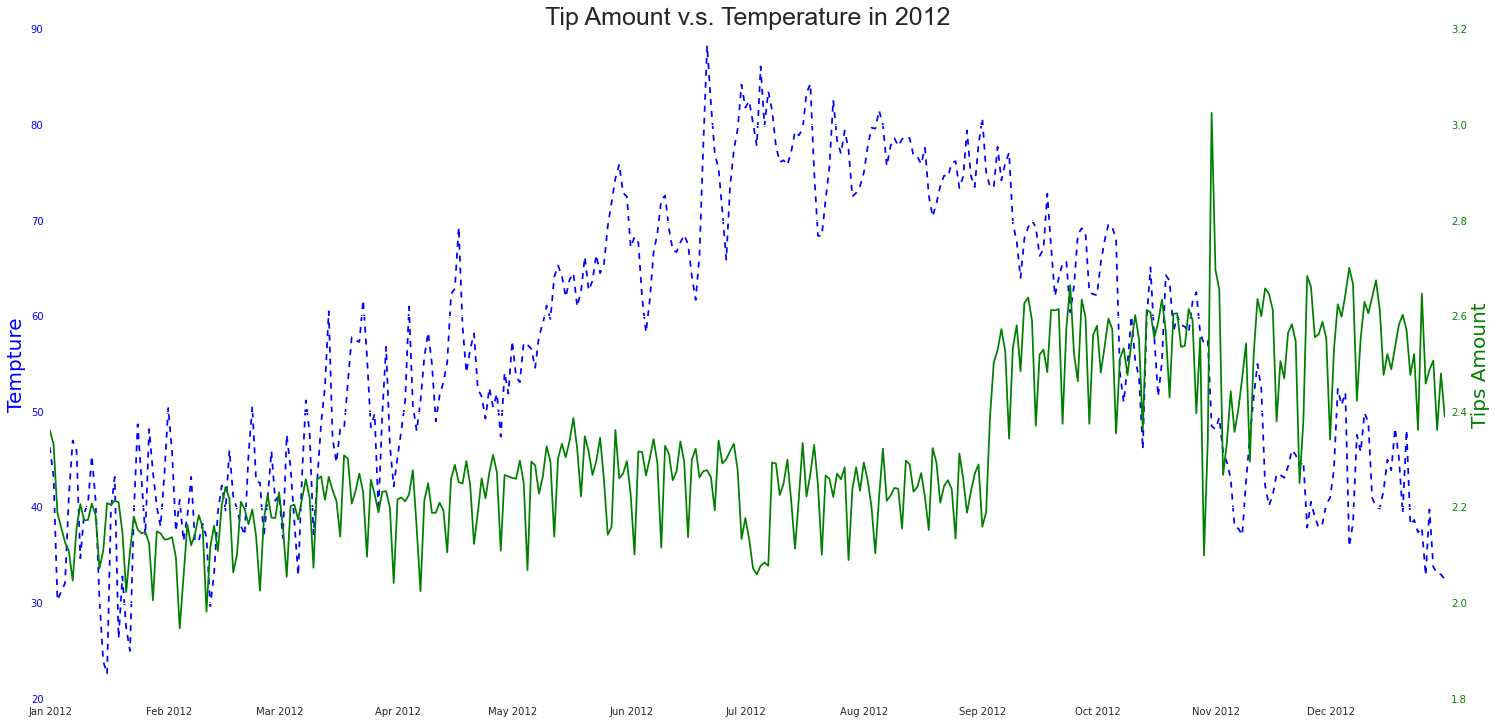

In [435]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize =(25,12))
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(data.Time, data.TEMP, 'b--')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Tempture', color='b',fontsize = 20)
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(data.Time, data.Tips, 'g-')
ax2.set_ylabel('Tips Amount', color='g',fontsize =20)
for tl in ax2.get_yticklabels():
    tl.set_color('g')

plt.title('Tip Amount v.s. Temperature in 2012',fontsize =25)
plt.show()

In [413]:
dataWinter = data [(data.Time > datetime.datetime(2012, 10, 15))&(data.Time < datetime.datetime(2012, 11, 8))]


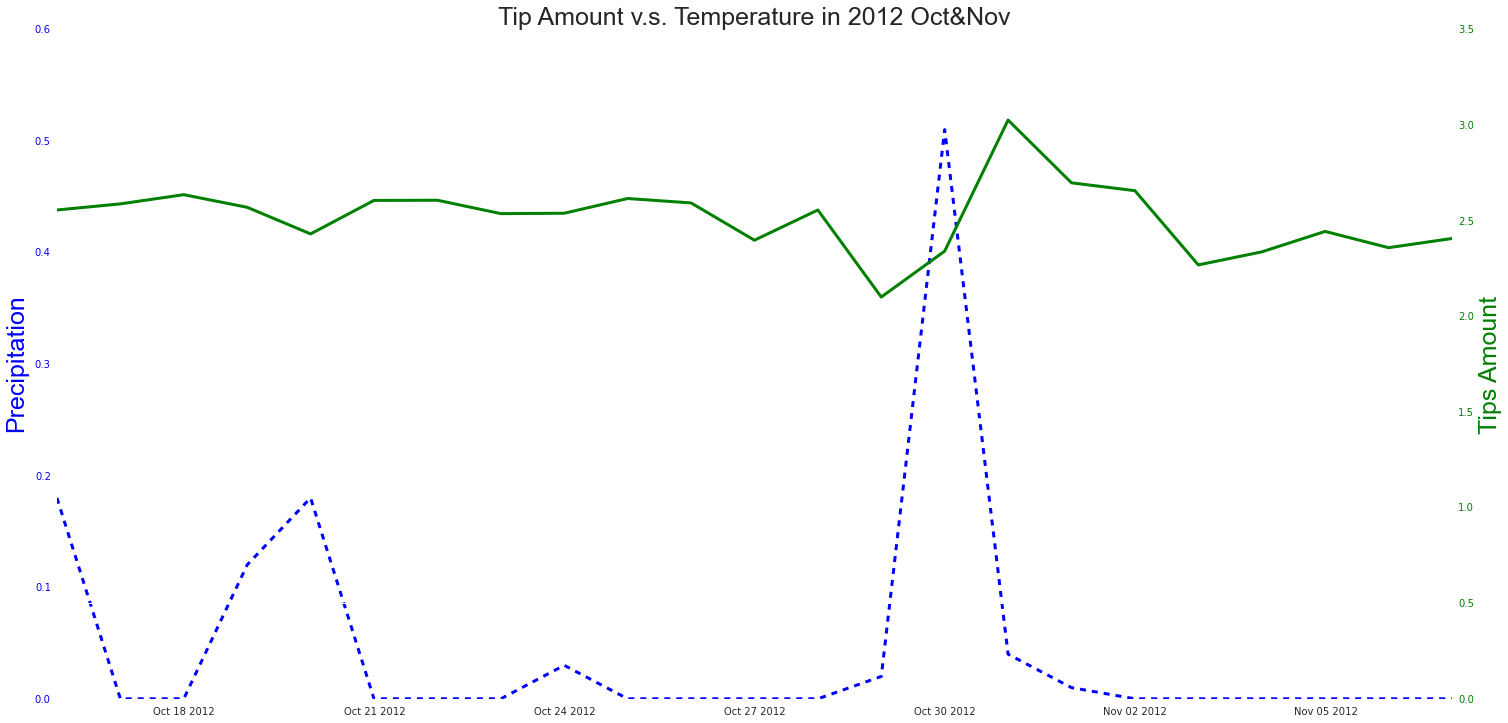

In [431]:
fig, ax1 = plt.subplots(figsize =(25,12))
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
f1 = ax1.plot(dataWinter.Time, dataWinter.PRCP, 'b--',linewidth=3,label='Precipitation')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Precipitation', color='b',fontsize =25)
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
f2 = ax2.plot(dataWinter.Time, dataWinter.Tips, 'g-',linewidth=3,label='Tips Amount')
ax2.set_ylabel('Tips Amount', color='g',fontsize =25)
ax2.set_ylim(0,3.5)
for tl in ax2.get_yticklabels():
    tl.set_color('g')
    

plt.title('Tip Amount v.s. Temperature in 2012 Oct&Nov',fontsize =25)
plt.show()

In [462]:
def month(time):
    return time.month

data['Month'] =[ month(y) for y in data.Time.values]

def week(time):
    return time.weekday()

data['Week'] =[ week(y) for y in data.Time.values]

In [483]:
data.tail()

,Time,Tips,TEMP,WDSP,VISIB,MAX,MIN,PRCP,SNDP,FRSHTT,Week,Month
361,2012-12-27 00:00:00,2.488,39.8,20.7,7.0,46.0,28.2,1.45,999.9,10000,3,12
362,2012-12-28 00:00:00,2.507,33.8,15.8,10.0,46.0,30.0,0.03,999.9,0,4,12
363,2012-12-29 00:00:00,2.362,33.1,6.3,8.9,39.9,28.0,0.00,999.9,11000,5,12
364,2012-12-30 00:00:00,2.480,33.0,18.3,8.9,37.0,28.2,0.26,999.9,1000,6,12
365,2012-12-31 00:00:00,2.390,32.5,14.6,10.0,39.0,28.0,0.00,999.9,0,0,12


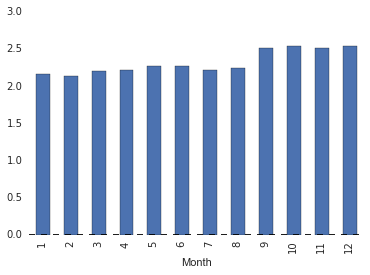

In [487]:
data.groupby(data['Month']).Tips.mean().plot(kind = 'bar')

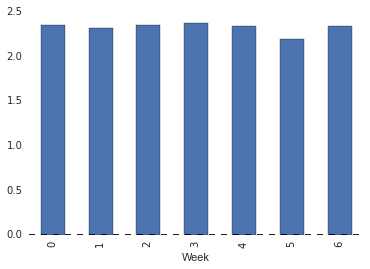

In [485]:
data.groupby(data['Week']).Tips.mean().plot(kind = 'bar')